### Problem Statement:  In this project, we have reviews from multiple users about different restaurants collected by a restaurant aggregator. So far the restaurant aggregator hasn’t utilized the collected data. The client wants us to analyze this dataset in all possible ways which will help them to understand their business and customers needs. Your job as a data analyst, is it to explore and come up with various insights about the business, restaurants, customers etc. 

### The activities you may perform during this projects are:
#### •Exploratory Data Analysis
#### •Text document representation using Bag of words analysis
#### •Sentiment Analysis using Text Classifier
#### •Building Naive Bayes Model
#### •TF-IDF Vectorization

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset into a pandas dataframe
df = pd.read_csv('restaurant_reviews.csv')

In [3]:
# Printing the first 5 rows of the dataframe
print(df.head())

             date     rating    res_id   res_name  \
0  17/03/19 22:18  Rated 5.0  18716525  Aura Cafe   
1  16/03/19 21:25  Rated 3.0  18716525  Aura Cafe   
2  16/03/19 10:18  Rated 4.0  18716525  Aura Cafe   
3   14/03/19 9:13  Rated 5.0  18716525  Aura Cafe   
4   12/03/19 4:56  Rated 4.0  18716525  Aura Cafe   

                     rev_count    rev_id        rev_name  \
0  153 Reviews , 250 Followers   1226687   Hussain Abbas   
1    33 Reviews , 86 Followers  27912218  Sunakshi Gupta   
2   41 Reviews , 200 Followers  38270346  Bhavya Thamban   
3   49 Reviews , 500 Followers  39225454   Lovely Sharma   
4   32 Reviews , 345 Followers    740280  Srayana Sanyal   

                                                text  
0  RATED  Aura has to be my Beautiful Breakfast p...  
1  RATED  A decent place to come over for chit ch...  
2  RATED  Everything is good about this place exc...  
3  RATED  Aura Cafe has a good ambiance with outd...  
4  RATED  Aura Cafe is the perfect place for 

In [4]:
# Getting a summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1079 non-null   object
 1   rating     1079 non-null   object
 2   res_id     1079 non-null   int64 
 3   res_name   1079 non-null   object
 4   rev_count  1079 non-null   object
 5   rev_id     1079 non-null   int64 
 6   rev_name   1079 non-null   object
 7   text       1079 non-null   object
dtypes: int64(2), object(6)
memory usage: 67.6+ KB
None


### Data Preprocessing

In [5]:
# Describing the numerical columns of the dataframe
print(df.describe())

             res_id        rev_id
count  1.079000e+03  1.079000e+03
mean   1.432333e+07  2.353338e+07
std    7.798584e+06  1.977927e+07
min    9.102600e+04  7.372000e+03
25%    1.824128e+07  2.115246e+06
50%    1.853874e+07  2.956250e+07
75%    1.871314e+07  3.805740e+07
max    1.892751e+07  9.200588e+07


In [6]:
# Checking for any missing values in the dataframe
print(df.isnull().sum())

date         0
rating       0
res_id       0
res_name     0
rev_count    0
rev_id       0
rev_name     0
text         0
dtype: int64


In [7]:
df.columns

Index(['date', 'rating', 'res_id', 'res_name', 'rev_count', 'rev_id',
       'rev_name', 'text'],
      dtype='object')

### Addition of new column for result analysis

In [8]:
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x in [4, 5] else 'negative')

In [9]:
from collections import defaultdict

# Create a dictionary that maps usernames to their respective review count and follower count
user_counts = defaultdict(lambda: {'reviews': 0, 'followers': 0})
for i, row in df.iterrows():
    username = row['rev_name'].split()[0].lower()
    user_counts[username]['reviews'] += 1
    user_counts[username]['followers'] = row['rev_count']

# Use the user_counts dictionary to create the rev_count column
df['rev_count'] = df['rev_name'].apply(lambda x: user_counts[x.split()[0].lower()]['reviews'])
df['rev_count'] = df.apply(lambda row: row['rev_count'] + row['rev_count']*row['rev_count']/row['rev_id'], axis=1)

In [10]:
# Check the number of unique values in each categorical column
print("\nNumber of unique values in categorical columns:")
print(df.nunique())


Number of unique values in categorical columns:
date         1074
rating          7
res_id         45
res_name       45
rev_count     728
rev_id        728
rev_name      726
text         1079
sentiment       1
dtype: int64


### Exploratory Data Analysis (EDA)

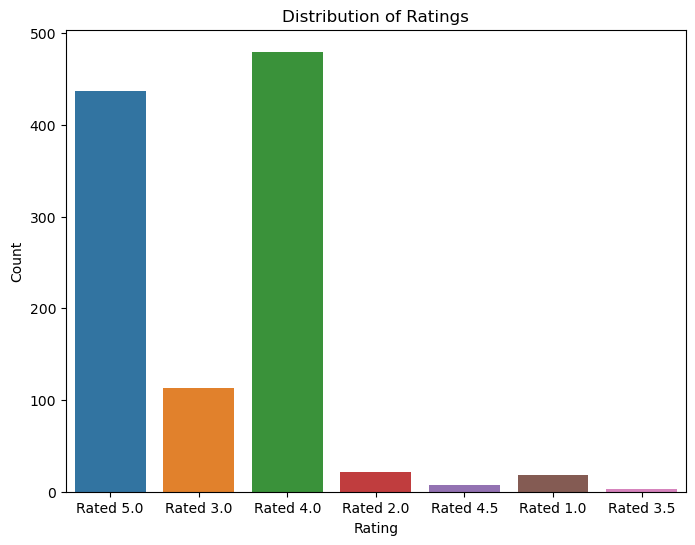

In [11]:
# Check the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

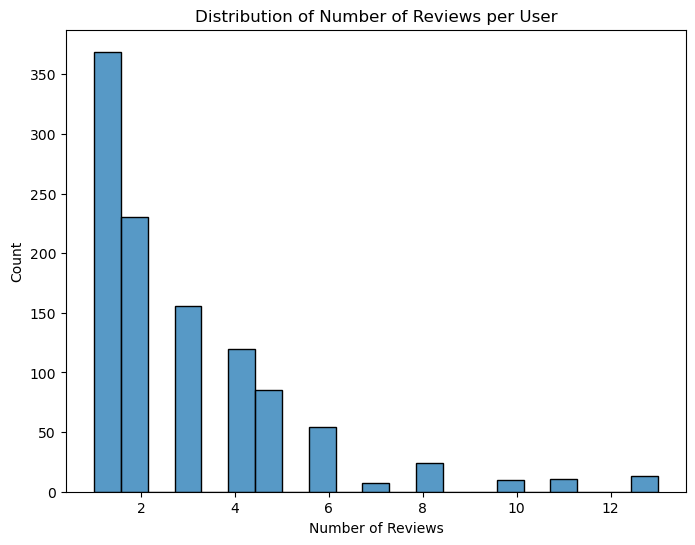

In [12]:
# Check the distribution of number of reviews per user
plt.figure(figsize=(8, 6))
sns.histplot(x='rev_count', data=df)
plt.title("Distribution of Number of Reviews per User")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.show()

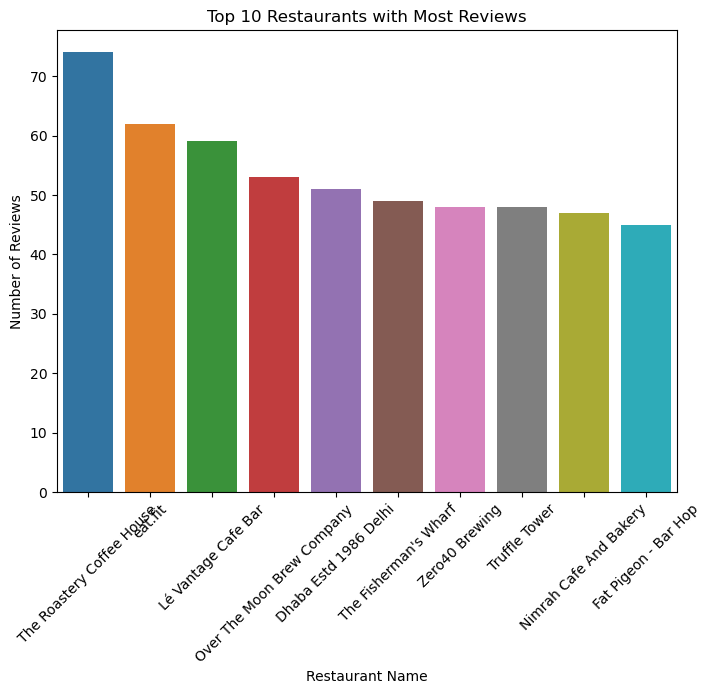

In [13]:
# Check the top 10 restaurants with most reviews
top_restaurants = df.groupby('res_name')['rev_id'].count().reset_index().sort_values('rev_id', ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x='res_name', y='rev_id', data=top_restaurants)
plt.title("Top 10 Restaurants with Most Reviews")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

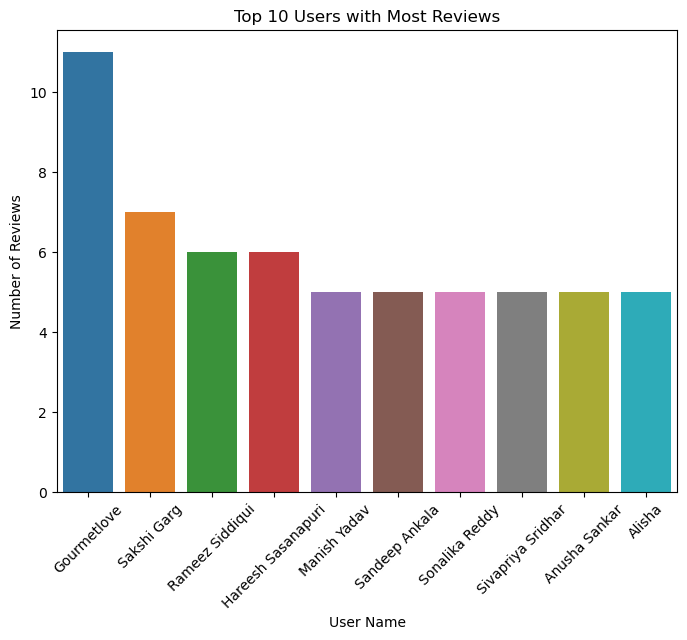

In [14]:
# Check the top 10 users with most reviews
top_users = df.groupby('rev_name')['rev_id'].count().reset_index().sort_values('rev_id', ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x='rev_name', y='rev_id', data=top_users)
plt.title("Top 10 Users with Most Reviews")
plt.xlabel("User Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Check the top 10 restaurants by number of reviews
top_restaurants = df.groupby('res_name')['rev_id'].count().sort_values(ascending=False).head(10)
print(top_restaurants)

res_name
The Roastery Coffee House     74
eat.fit                       62
Lé Vantage Cafe Bar           59
Over The Moon Brew Company    53
Dhaba Estd 1986 Delhi         51
The Fisherman's Wharf         49
Zero40 Brewing                48
Truffle Tower                 48
Nimrah Cafe And Bakery        47
Fat Pigeon - Bar Hop          45
Name: rev_id, dtype: int64


### Text document representation using Bag of Words analysis

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a CountVectorizer object
vectorizer = CountVectorizer()

# Fitting the vectorizer on the text data
vectorizer.fit(df['text'])

# Creating the bag of words matrix
bow_matrix = vectorizer.transform(df['text'])

# Printing the shape of the matrix
print(bow_matrix.shape)

(1079, 6123)


In [17]:
# Importing the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Creating a bag of words representation of the reviews
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
print(X.shape)
print(vectorizer.get_feature_names_out())

(1079, 6123)
['00' '00pm' '07' ... 'zones' 'zucchini' 'zuchini']


In [18]:
bow_matrix

<1079x6123 sparse matrix of type '<class 'numpy.int64'>'
	with 57212 stored elements in Compressed Sparse Row format>

### Sentiment Analysis using Text Classifier

In [19]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], random_state=42)

In [21]:
# Creating a text classification pipeline with a CountVectorizer and a MultinomialNB classifier
clf = make_pipeline(CountVectorizer(), MultinomialNB())

# Fitting the pipeline on the training data
clf.fit(X_train, y_train)

# Predicting the sentiment of the test data
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# Creating a confusion matrix of the classifier
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 1.0
Confusion matrix:
 [[270]]


### Building Naive Bayes Model

In [22]:
# Creating a bag of words representation of the reviews
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Fitting a Naive Bayes model on the training data
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [23]:
# Creating a bag of words representation of the test data
X_test_vec = vectorizer.transform(X_test)

# Predicting the sentiment of the test data
y_pred = nb.predict(X_test_vec)

# Calculating the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# Creating a confusion matrix of the classifier
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Accuracy: 1.0
Confusion matrix:
 [[270]]


### TF-IDF Vectorization

In [24]:
# Importing the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], random_state=42)

# Creating a TF-IDF representation of the reviews
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Fitting a Naive Bayes model on the training data
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Creating a TF-IDF representation of the test data
X_test_tfidf = vectorizer.transform(X_test)

# Predicting the sentiment of the test data
y_pred = nb.predict(X_test_tfidf)

# Calculating the accuracy of the classifier
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

# Creating a confusion matrix of the classifier
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)


Accuracy: 1.0
Confusion matrix:
 [[270]]
